In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


df = pd.read_csv('data4.csv')
df.head()




,User ID,Friends,Messages Sent
0,user_1,"['user_16', 'user_20', 'user_7', 'user_8']",167
1,user_2,['user_16'],185
2,user_3,"['user_19', 'user_31', 'user_42', 'user_25', '...",133
3,user_4,"['user_46', 'user_45', 'user_43', 'user_6', 'u...",129
4,user_5,"['user_48', 'user_17', 'user_12', 'user_31', '...",121


In [ ]:
G = nx.DiGraph()
suspicious_nodes = []


for i, row in df.iterrows():
    user_id = row['User ID']


    friends = row['Friends']
    if isinstance(friends, (int, np.integer)):
        friends = [friends]
    elif isinstance(friends, str):
        friends = eval(friends)


    for friend in friends:
        G.add_edge(user_id, friend)


    num_friends = len(friends)
    num_messages = row['Messages Sent']


    if num_friends < 3 and num_messages > 180:
        suspicious_nodes.append(user_id)


df['Num_Friends'] = df['Friends'].apply(lambda x: len(eval(x)) if isinstance(x, str) else len(x))
df.head()




,User ID,Friends,Messages Sent,Num_Friends
0,user_1,"['user_16', 'user_20', 'user_7', 'user_8']",167,4
1,user_2,['user_16'],185,1
2,user_3,"['user_19', 'user_31', 'user_42', 'user_25', '...",133,9
3,user_4,"['user_46', 'user_45', 'user_43', 'user_6', 'u...",129,8
4,user_5,"['user_48', 'user_17', 'user_12', 'user_31', '...",121,8


In [ ]:
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)
print("In degree centrality = ",in_degree_centrality)
print("Out degree centrality = ",out_degree_centrality)

in_degree_threshold = np.percentile(list(in_degree_centrality.values()), 90)
out_degree_threshold = np.percentile(list(out_degree_centrality.values()), 90)
print("In degree threshold = ",in_degree_threshold)
print("Out degree threshold = ",out_degree_threshold)






In degree centrality =  {'user_1': 0.24489795918367346, 'user_16': 0.3877551020408163, 'user_20': 0.2857142857142857, 'user_7': 0.3061224489795918, 'user_8': 0.3061224489795918, 'user_2': 0.2857142857142857, 'user_3': 0.26530612244897955, 'user_19': 0.24489795918367346, 'user_31': 0.32653061224489793, 'user_42': 0.32653061224489793, 'user_25': 0.3061224489795918, 'user_12': 0.3469387755102041, 'user_47': 0.24489795918367346, 'user_24': 0.18367346938775508, 'user_15': 0.22448979591836732, 'user_50': 0.24489795918367346, 'user_4': 0.3061224489795918, 'user_46': 0.26530612244897955, 'user_45': 0.26530612244897955, 'user_43': 0.2857142857142857, 'user_6': 0.2857142857142857, 'user_40': 0.26530612244897955, 'user_36': 0.32653061224489793, 'user_5': 0.32653061224489793, 'user_48': 0.22448979591836732, 'user_17': 0.3061224489795918, 'user_26': 0.26530612244897955, 'user_37': 0.3469387755102041, 'user_22': 0.36734693877551017, 'user_27': 0.2857142857142857, 'user_38': 0.22448979591836732, 'use

In [ ]:
in_degree_dict = dict(G.in_degree())
out_degree_dict = dict(G.out_degree())


df['In_Degree'] = df['User ID'].map(in_degree_dict)
df['Out_Degree'] = df['User ID'].map(out_degree_dict)


df.head()

,User ID,Friends,Messages Sent,Num_Friends,In_Degree,Out_Degree
0,user_1,"['user_16', 'user_20', 'user_7', 'user_8']",167,4,12,4
1,user_2,['user_16'],185,1,14,1
2,user_3,"['user_19', 'user_31', 'user_42', 'user_25', '...",133,9,13,9
3,user_4,"['user_46', 'user_45', 'user_43', 'user_6', 'u...",129,8,15,8
4,user_5,"['user_48', 'user_17', 'user_12', 'user_31', '...",121,8,16,8


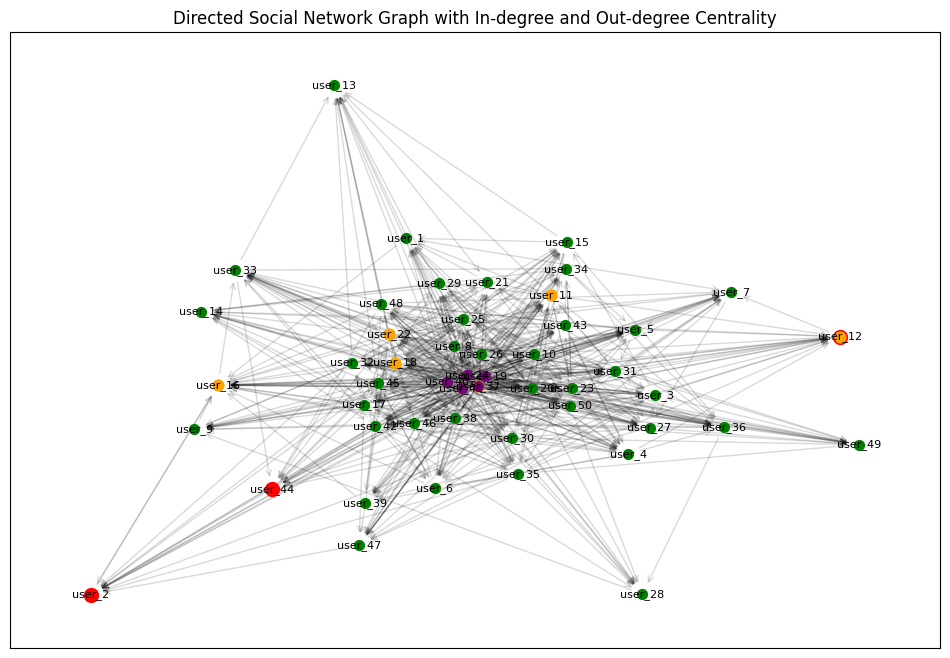

Suspicious Users Based on Friends and Messages:
 ['user_2', 'user_12', 'user_44']
High In-Degree Centrality Users (90th percentile or above):
 ['user_16', 'user_12', 'user_37', 'user_22', 'user_11', 'user_18']
High Out-Degree Centrality Users (90th percentile or above):
 ['user_19', 'user_24', 'user_40', 'user_37', 'user_41']


In [ ]:
high_in_degree_nodes = [node for node, centrality in in_degree_centrality.items() if centrality >= in_degree_threshold]
high_out_degree_nodes = [node for node, centrality in out_degree_centrality.items() if centrality >= out_degree_threshold]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)


nx.draw_networkx_nodes(G, pos, node_color='green', node_size=50)
nx.draw_networkx_nodes(G, pos, nodelist=suspicious_nodes, node_color='red', node_size=100)
nx.draw_networkx_nodes(G, pos, nodelist=high_in_degree_nodes, node_color='orange', node_size=60)
nx.draw_networkx_nodes(G, pos, nodelist=high_out_degree_nodes, node_color='purple', node_size=50)


nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, alpha=0.15)


nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")


plt.title("Directed Social Network Graph with In-degree and Out-degree Centrality")
plt.show()


print("Suspicious Users Based on Friends and Messages:\n", suspicious_nodes)
print("High In-Degree Centrality Users (90th percentile or above):\n", high_in_degree_nodes)
print("High Out-Degree Centrality Users (90th percentile or above):\n", high_out_degree_nodes)